# ** Introduction to recursion**

Recursion is a problem solving method. In code, recursion is implemented using a function that calls itself.

The opposite of a recursive algorithm would be an iterative algorithm. There is a branch of study that proves that any iterative algorithm can be written recursively. While iterative algorithms use for loops and while loops to simulate repetition, recursive algorithms use function calls to simulate the same logic.

Let's say that we wanted to print the numbers from 1 to 10. Here's some pseudocode for an iterative algorithm

    for (int i = 1; i <= 10; i++) {
    print(i)
    }

Here's some pseudocode for an equivalent recursive algorithm:

    function fn(i):
    print(i)
    fn(i + 1)
    return

    fn(1)

Each call to fn first prints i (which starts at 1), and then calls fn again, but incrementing i (to print the next number).

    The first function call prints 1, then calls fn(2). In fn(2), we print 2, then call fn(3), and so on.

However, this code is actually wrong. Do you see the problem? The function calls will never stop! Running this code would print natural numbers (positive integers) infinitely (or until the computer exploded). The return line never gets reached because fn(i + 1) comes before it.

We need what is called a base case to make the recursion stop. Base cases are conditions at the start of recursive functions that terminate the calls.

    function fn(i):
        if i > 10:
            return

        print(i)
        fn(i + 1)
        return

    fn(1)

    After we call fn(10), we print 10 and call fn(11). In the fn(11) call, we trigger the base case and return. So now we are back in the call to fn(10) and move to the next line, which is the return statement. This makes us return back to the fn(9) call and so on, until we eventually return from the fn(1) call and the algorithm terminates.

An important thing to understand about recursion is the order in which the code runs - the order in which the computer executes instructions. With an iterative program, it's easy - start at the top, and go line by line. With recursion, it can get confusing because calls can cascade on top of each other. Let's print numbers again, but this time only up to 3. Let's also add another print statement and number the lines:

In [2]:
def fn(i):

    if i > 3:
      return

    print(i)
    fn(i + 1)
    print(f"End of call where i = {i}")
    return

fn(1)

1
2
3
End of call where i = 3
End of call where i = 2
End of call where i = 1


As you can see, the line where we print text is executed in reverse order. The original call fn(1) first prints 1, then calls to fn(2), which prints 2, then calls to fn(3), which prints 3, then calls to fn(4). Now, this is the important part: how recursion "moves" back "up". fn(4) triggers the base case, which returns. We are now back in the function call where i = 3 and line 4 has finished, so we move to the line 5 which prints "End of call where i = 3". Once that line runs, we move to the next line, which is a return. Now, we are back in the function call where i = 2 and line 4 line has finished, so again we move to the next line and print "End of the call where i = 2". This repeats until the original function call to fn(1) returns.

    Every function call "exists" until it returns. When we move to a different function call, the old one waits until the new one returns. The order in which the calls happens is remembered, and the lines within the functions are executed in order.

    Note that each function call also has its own local scope. So in the example above, when we call f(3), there are 3 "versions" of i simultaneously. The first call has i = 1, the second call has i = 2, and the third call has i = 3. Let's say that we were to do i += 1 in the f(3) call. Then i becomes 4, but only in the f(3) call. The other 2 "versions" of i are unaffected because they are in different scopes.

Let's look at the Fibonacci numbers. The Fibonacci numbers are a sequence of numbers starting with 0, 1. Then, each number is defined as the sum of the previous two numbers. The first few Fibonacci numbers are 0, 1, 1, 2, 3, 5, 8. More formally, we have

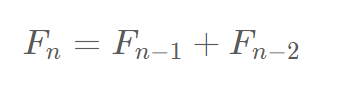

This is called a recurrence relation - it's an equation that connects the terms together.

Let's use pseudocode to write a function F(n) that returns the nth Fibonacci number (0 indexed). Don't forget we need base cases with any recursive function. In this case the base cases are explicitly defined: F(0) = 0 and F(1) = 1.

In [10]:
def Fibonacci(n):
    if n <= 1:
        return n

    oneBack = Fibonacci(n - 1)
    twoBack = Fibonacci(n - 2)
    return oneBack + twoBack
Fibonacci(3)

2

Let's say that we wanted to find F(3). Upon calling F(3), we would see the following flow, with each indentation level representing a function call's scope:

    oneBack = F(2)
        oneBack = F(1)
            F(1) = 1
        twoBack = F(0)
            F(0) = 0
        F(2) = oneBack + twoBack = 1
    twoBack = F(1)
        F(1) = 1
    F(3) = oneBack + twoBack = 2

As you can see, we took the original problem F(3), and broke it down into two smaller subproblems - F(2) and F(1). By combining the recurrence relation and base cases, we can solve the subproblems and use those solutions to solve the original problem.

This is the most common use of recursion - you have your recursive function return the answer to the problem you're trying to solve for a given input. In this example, the problem we're trying to solve for a given input is "What is the nth
  Fibonacci number? As such, we designed our function to return a Fibonacci number, according to the input n. By determining the base cases and a recurrence relation, we can easily implement the function.

By following this idea, solving the subproblems is easy - if we wanted the 100th Fibonacci number, we know by definition that it is the sum of the 99th and 98th Fibonacci number. On the function call to F(100), we know that calling F(99) and F(98) will give us those numbers.